# Pie Chart or Pizza
We are adapting the VGGNet architecture proposed by [Simonyan and Zisserman](https://arxiv.org/abs/1409.1556) to the requirements of our chart identification problem. We train our system on a dataset consisting of chart images from the [ReVision](https://dl.acm.org/citation.cfm?id=2047247) corpus and general-purpose images from [ILSVRC-2012](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks).

This Jupyter Notebook will allow you to load a pre-trained version of our model, and use it to classify images on the web. In case a given image depicts a data visualisation, the model should predict its chart type; otherwise it should predict the `Various` class. The supported chart types are: (i) `AreaGraph`, (ii) `BarChart`, (iii) `BoxPlot`, (iv) `LineGraph`, (v) `Map`, (vi) `ParetoChart`, (vii) `PieChart`, (viii) `RadarPlot`, (ix) `ScatterGraph`, (x) `Table`, and (xi) `VennDiagram`. You will also find that certain data visualisations are more challenging to be classified correctly that others.

This source code is licensed under the Apache 2 license found in the LICENSE file in the root directory of this source tree.

In [1]:
import os
import utils.presentation_utils

In [2]:
downloaded_images_dir = './cache/' # Directory in which any downloaded images are saved.
if not os.path.exists(downloaded_images_dir):
    os.makedirs(downloaded_images_dir)

## Downloading and Processing an Image
Copy and paste the URL of an image that you wish to download and classify below.

In [3]:
# Define the URL of the image whose chart types you wish to identify.
temp_image_url = 'https://www.meta-chart.com/assets/images/pie/pie_value.png'

### Downloading the image from the provided URL

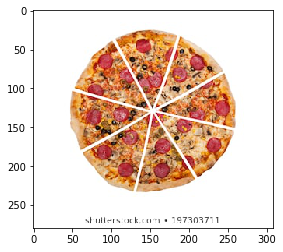

In [4]:
temp_file_location = os.path.join(downloaded_images_dir, temp_image_url.split('/')[-1])
# Downloading the image using the requests library and storing it into the location
# defined by the downloaded_images_dir variable.
utils.presentation_utils.download_image(temp_image_url, temp_file_location)

## Loading our Pre-trained ConvNet
Loading a model based on Convolutional Neural Networks (ConvNets) capable of identifying whether a downloaded image displays a chart or not, and in case it does its exact chart type.

The architecture of the pre-trained ConvNet is presented below:

![Our Neural Architecture](Drawings/ConvNet.png)

In [5]:
cnn_network_with_pred_layer, idx_to_class = utils.presentation_utils.load_pretrained_model()

## Predicting the Chart Type of the Image

We will use the pre-trained ConvNet that we loaded above in order to predict whether the downloaded image displays a chart. In case it does, we are trying to predict the depicted chart type(s).

I believe this to be an image of type: PieChart


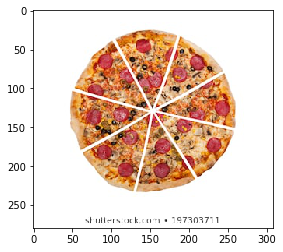

In [6]:
pred = cnn_network_with_pred_layer(utils.presentation_utils.return_tensor(temp_file_location))
# Since predictions are based on replicating the single image's tensor,
# we only pick the index one of the returned predictions.
pred_idx = pred.max(1)[1].numpy()[0]
print 'I believe this to be an image of type: %s' % idx_to_class[pred_idx]

